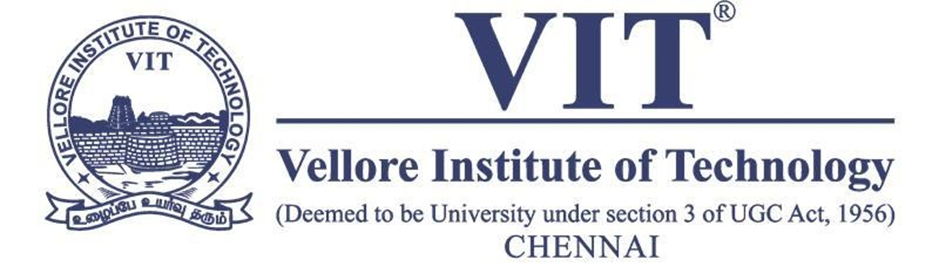


**Name:** Shaahid Ahmed N  
**RegNo.:** 21BAI1087  
**Course & Course Code:** Machine Vision Lab & BCSE417P  
**Lab & Date:** Assesment-4 & 13-11-2024  
**Slot:** L43+L44  

By turning in this assignment, I agree and declare that all of this is my own work.

# Imports

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load Video using OpenCV

In [6]:
# Load the video
video_path = '/content/1900-151662242_tiny.mp4'
cap = cv2.VideoCapture(video_path)

# Check if video is loaded successfully
if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

# Retrieve the frames per second (FPS) for timestamp calculation
fps = cap.get(cv2.CAP_PROP_FPS)
max_frames = int(fps * 5)

# Step 2: Motion Estimation using Manual Frame Differencing and Histogram Calculation

In [7]:
# Parameters
THRESHOLD_DIFF = 0.04  # Threshold for histogram similarity
FRAME_DIFFERENCE_THRESHOLD = 10  # Binary threshold for frame differencing
MIN_AREA = 1000  # Minimum number of pixels for motion

# Initialize variables
motion_detected_frames = []

# Read the first frame and convert it to grayscale
ret, previous_frame = cap.read()
if not ret:
    print("Error: Could not read the first frame.")
    cap.release()
    exit()
previous_gray = cv2.cvtColor(previous_frame, cv2.COLOR_BGR2GRAY)

# Function to calculate histogram manually
def calculate_histogram(image, bins=256, range_min=0, range_max=256):
    hist = np.zeros(bins)
    for pixel in image.ravel():
        hist[int((pixel - range_min) / (range_max - range_min) * bins)] += 1
    return hist / hist.sum()

# Process each frame
for frame_count in range(max_frames):
    ret, current_frame = cap.read()
    if not ret:
        break

    # Convert the current frame to grayscale
    current_gray = cv2.cvtColor(current_frame, cv2.COLOR_BGR2GRAY)

    # Calculate histograms manually
    hist_prev = calculate_histogram(previous_gray)
    hist_current = calculate_histogram(current_gray)

    # Calculate histogram similarity (1 - correlation coefficient)
    hist_diff = np.sum(np.abs(hist_prev - hist_current))

    # If histogram difference is significant, process frame for motion
    if hist_diff > THRESHOLD_DIFF:
        # Manual frame differencing
        frame_diff = np.abs(current_gray.astype(int) - previous_gray.astype(int))
        motion_mask = (frame_diff > FRAME_DIFFERENCE_THRESHOLD).astype(np.uint8) * 255

        # Detect motion regions by counting "on" pixels in motion mask
        motion_intensity = np.sum(motion_mask > 0)

        # Store frames with significant motion
        if motion_intensity > MIN_AREA:
            timestamp = frame_count / fps  # Calculate timestamp in seconds
            motion_detected_frames.append((current_frame, timestamp, motion_mask))

    # Update the previous frame
    previous_gray = current_gray

cap.release()

In this section:

**Histogram Calculation:** We manually create a histogram for each
grayscale frame.

**Motion Mask:** We compute the absolute difference between consecutive frames and create a binary mask for motion regions.

# Step 3: Event Detection and Visualization

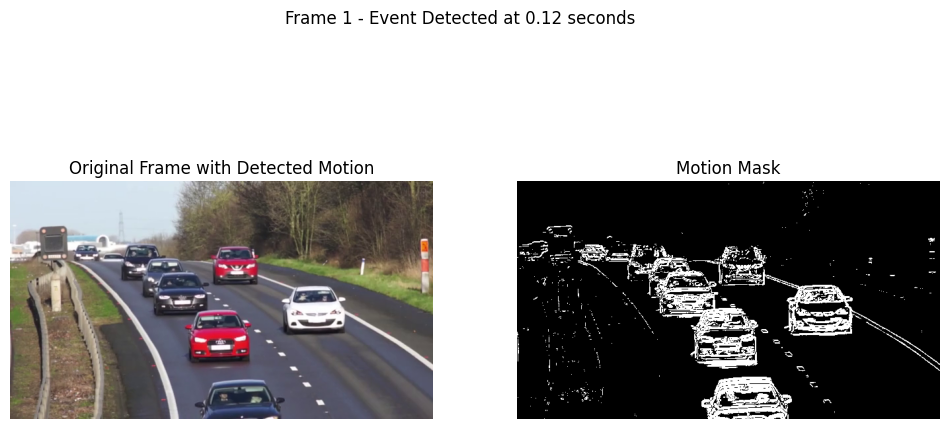

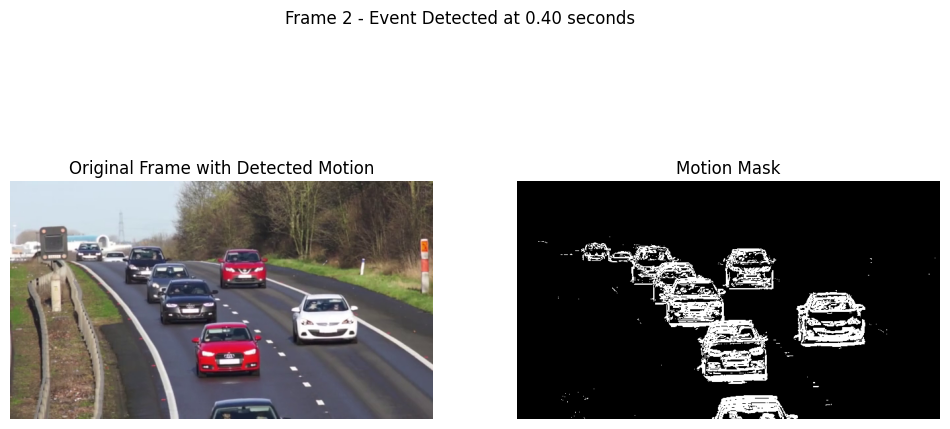

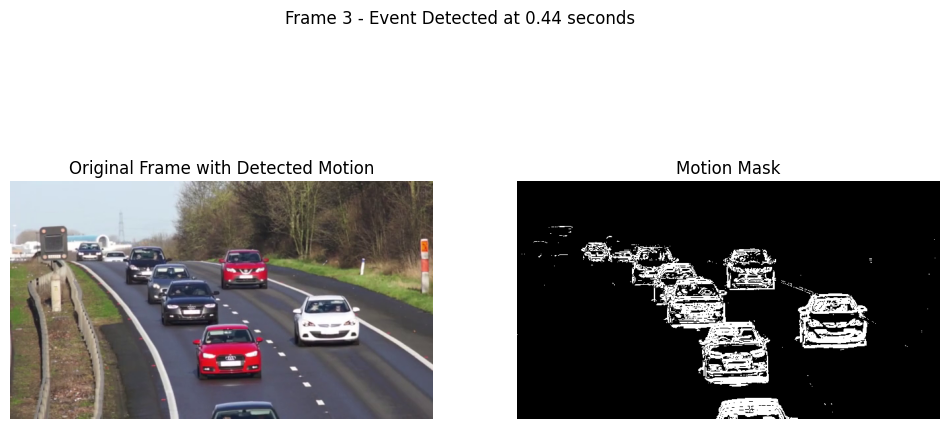

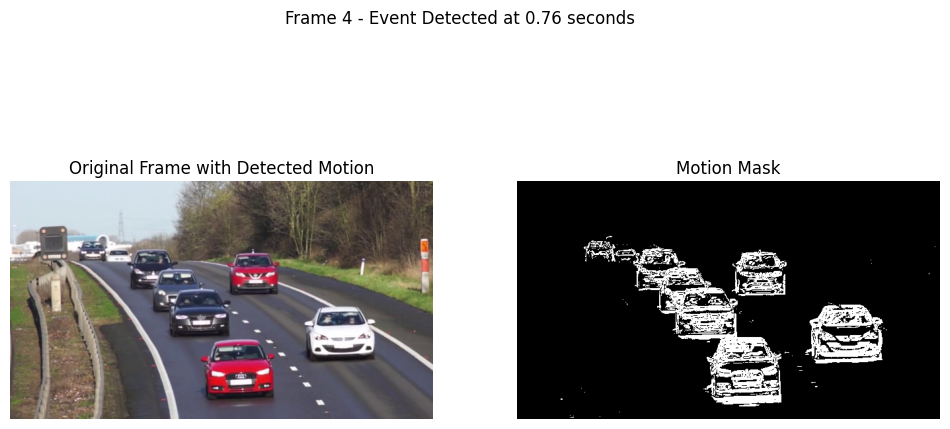

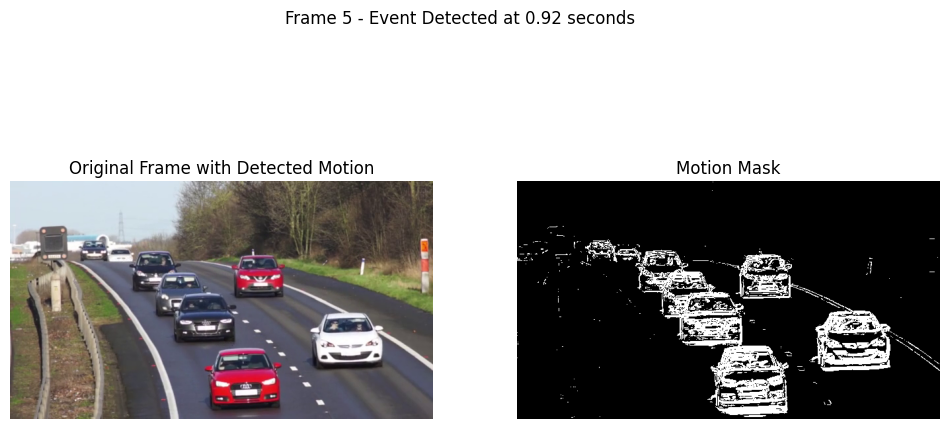

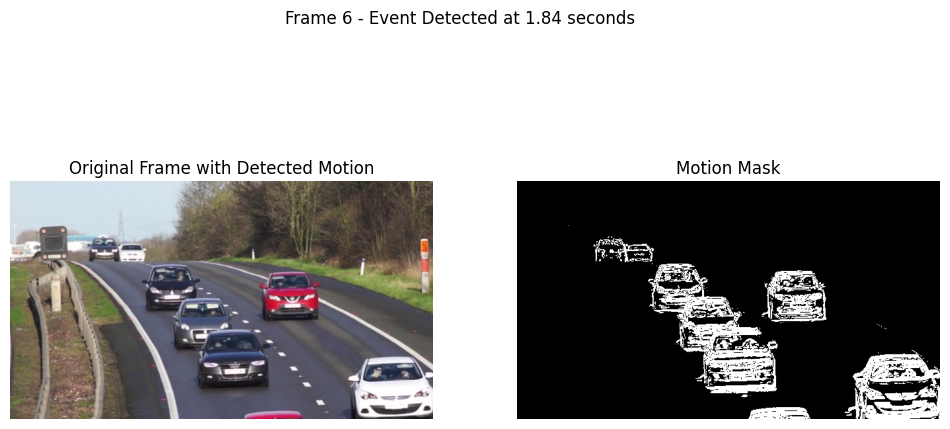

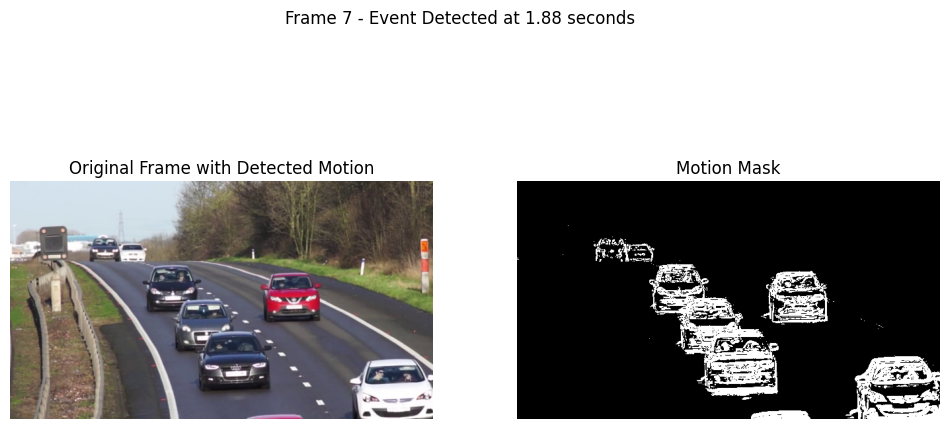

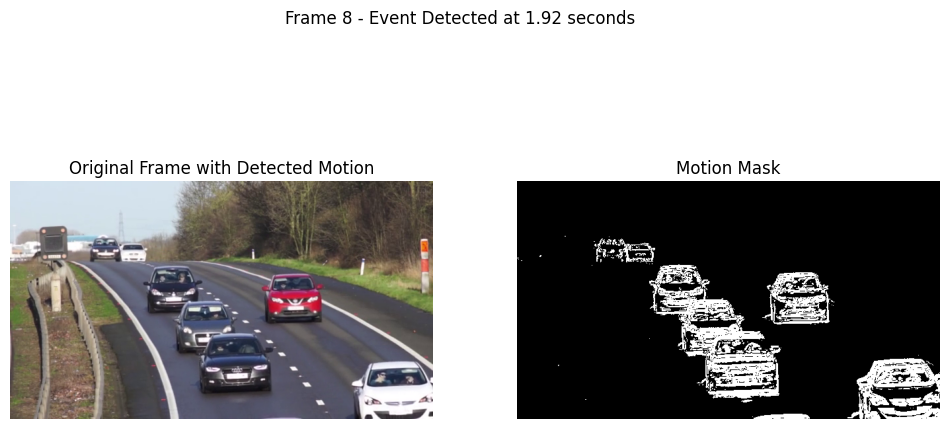

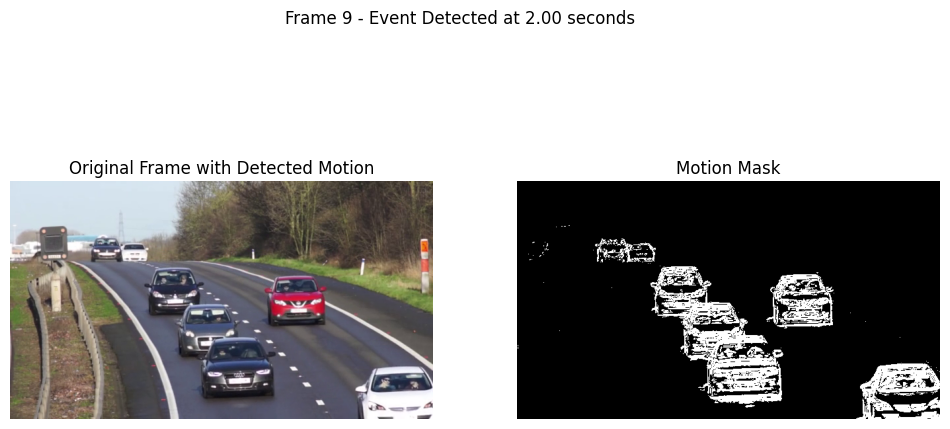

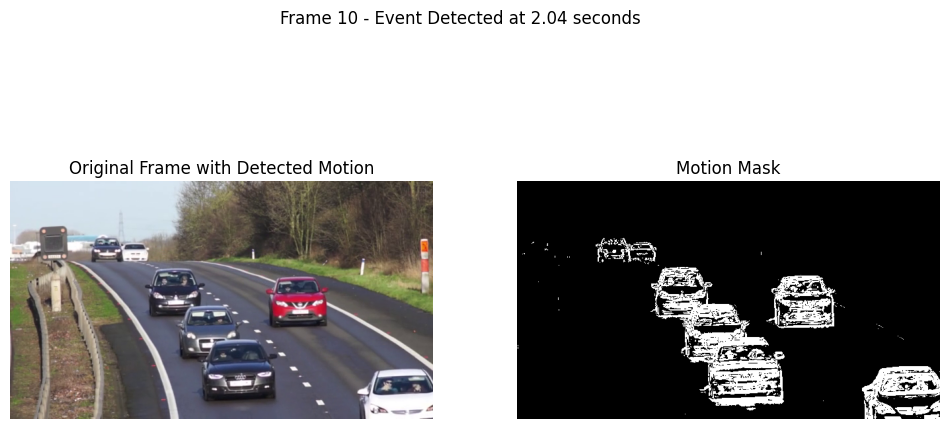

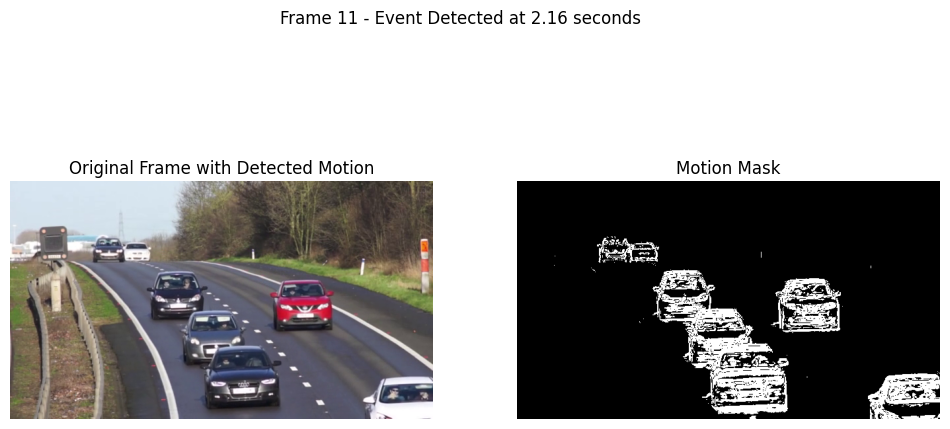

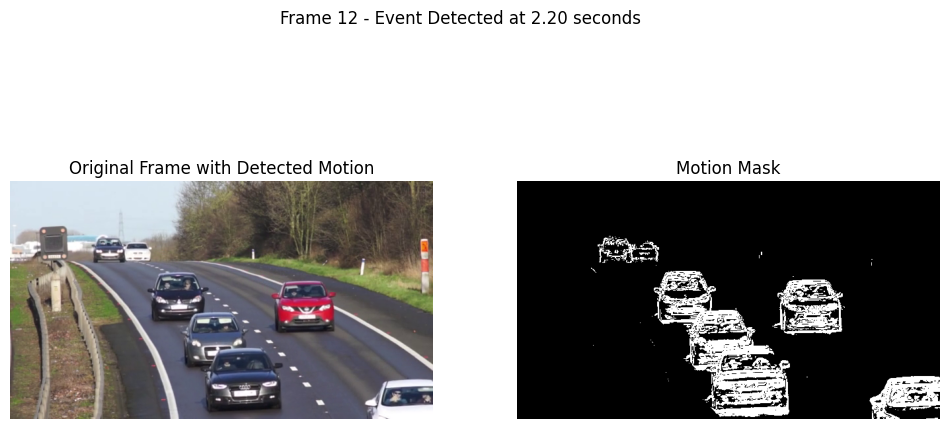

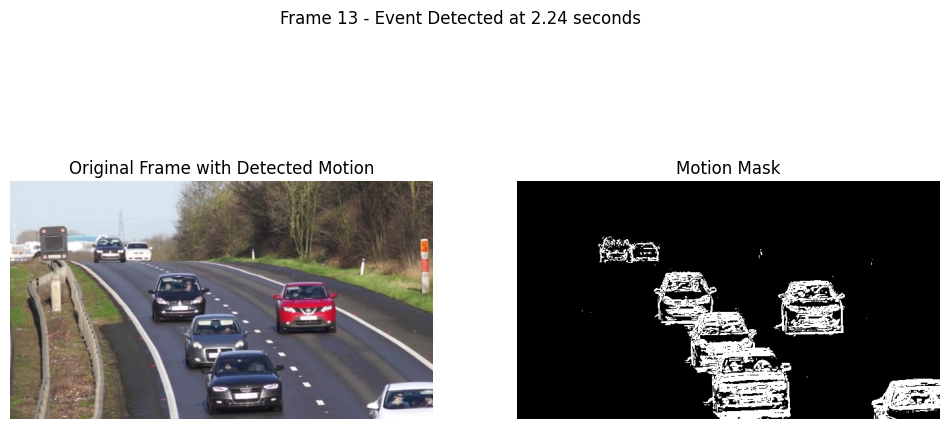

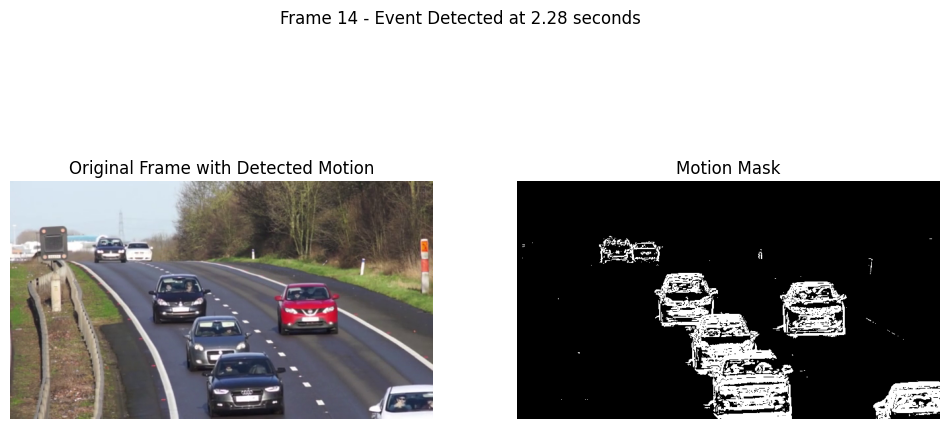

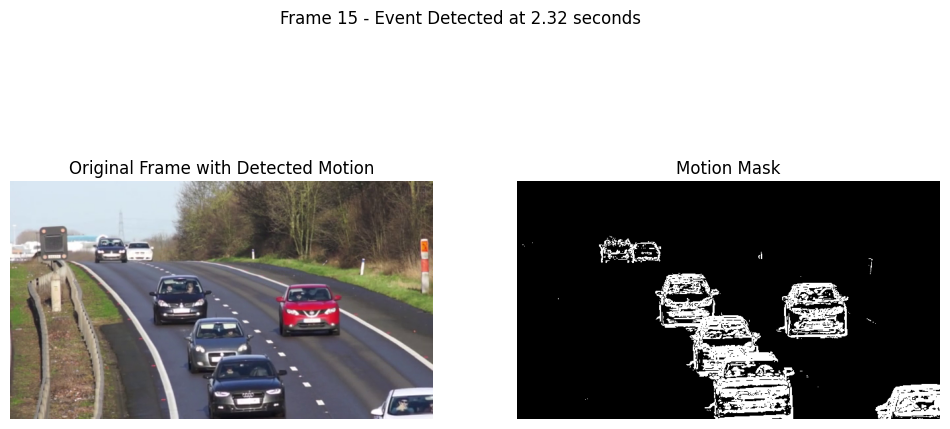

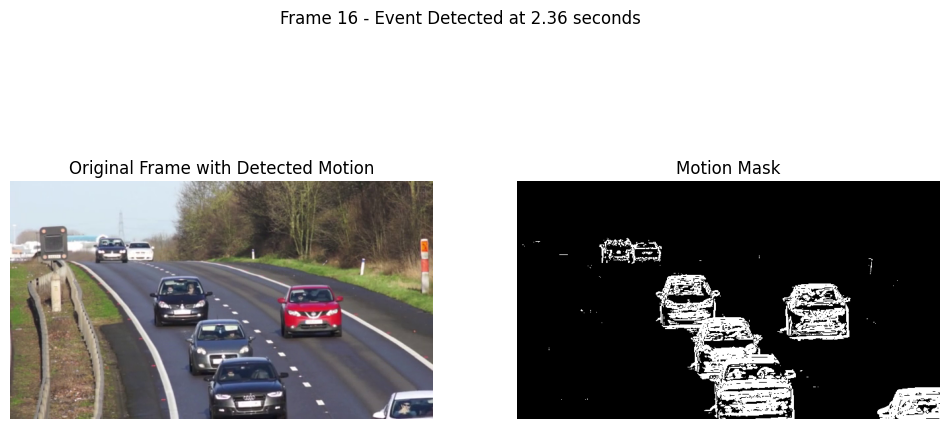

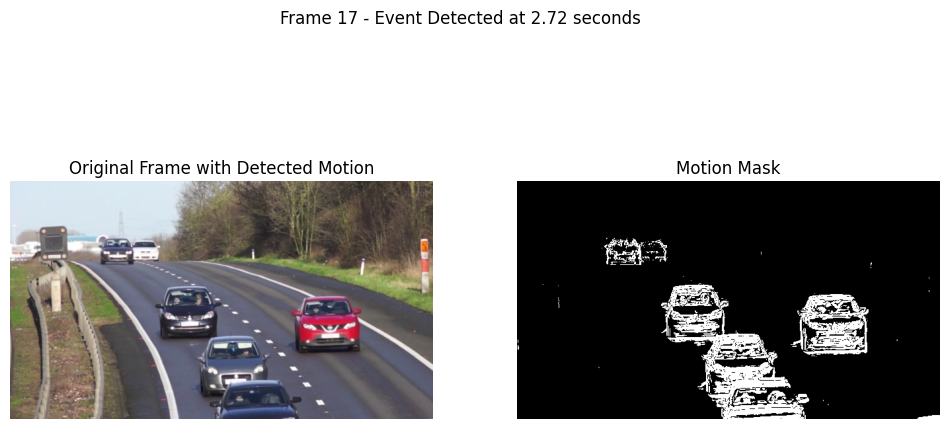

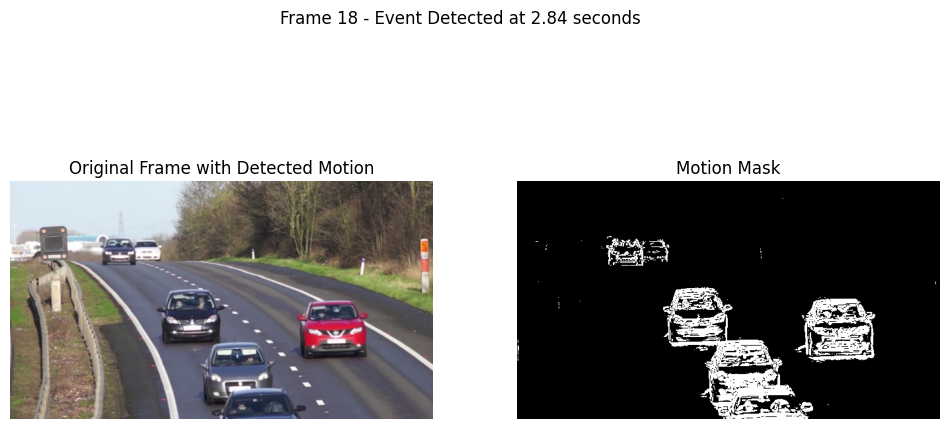

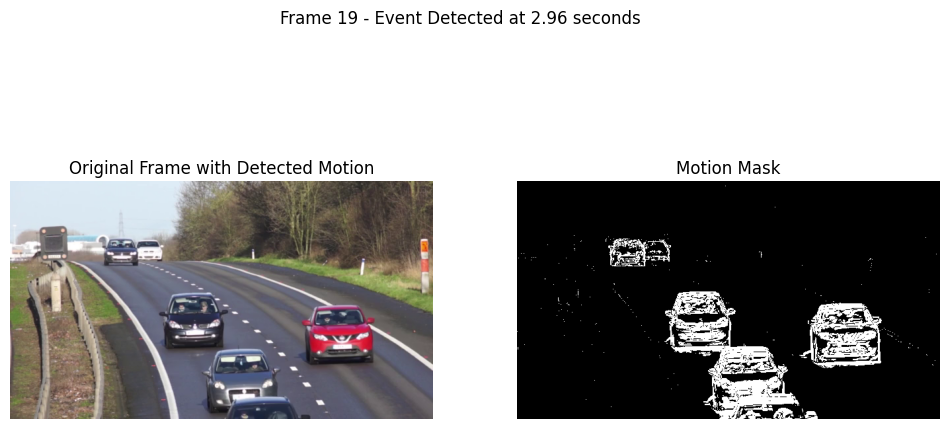

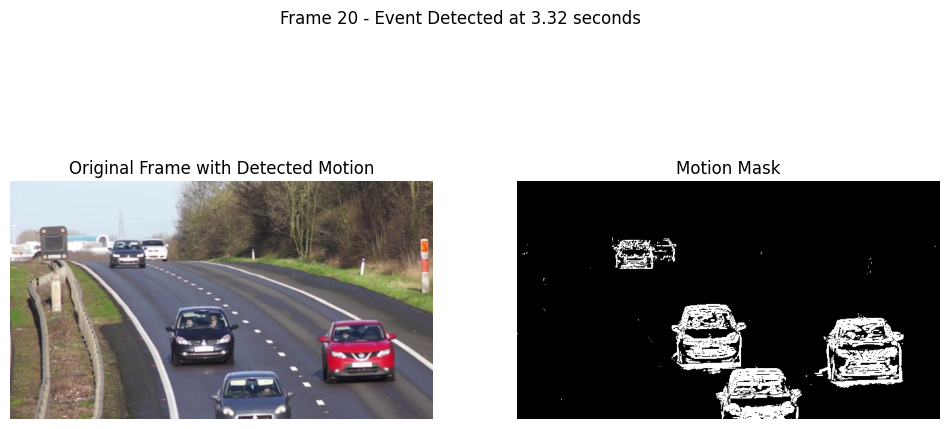

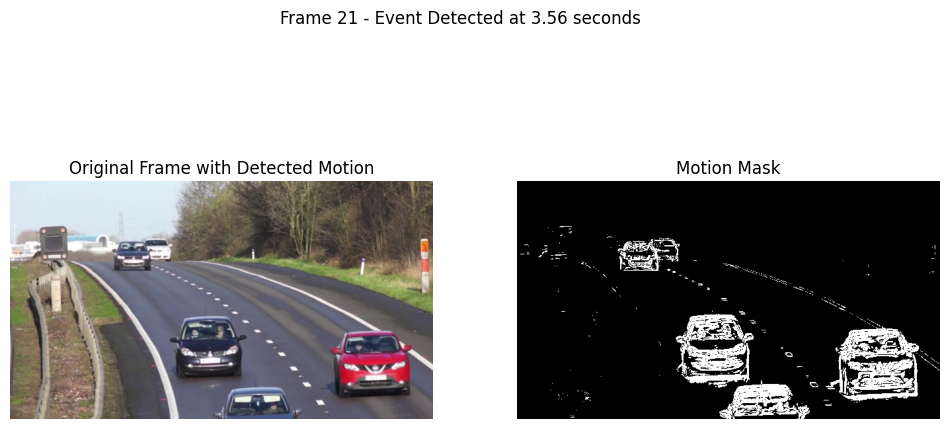

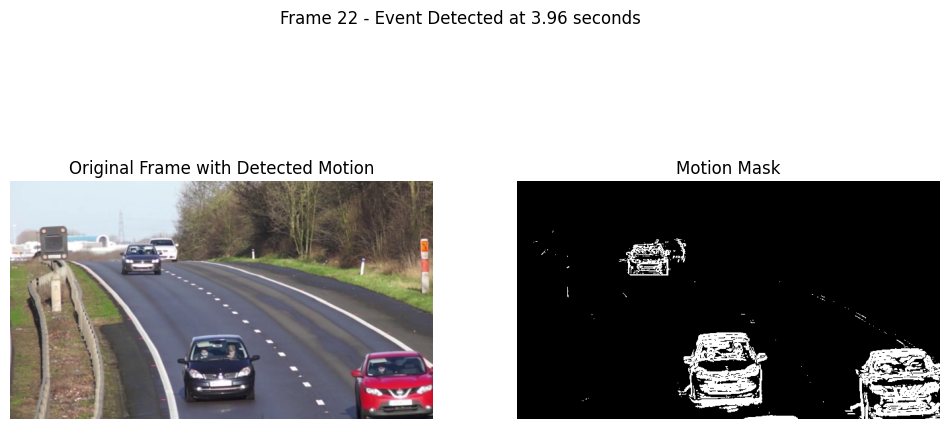

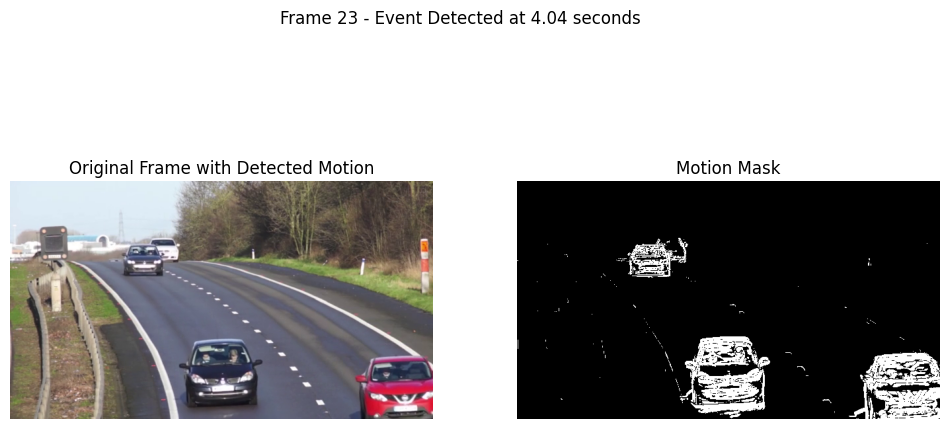

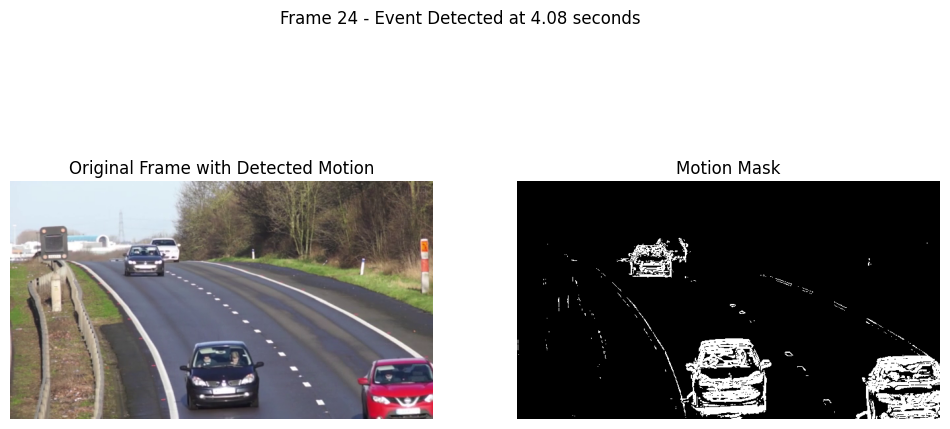

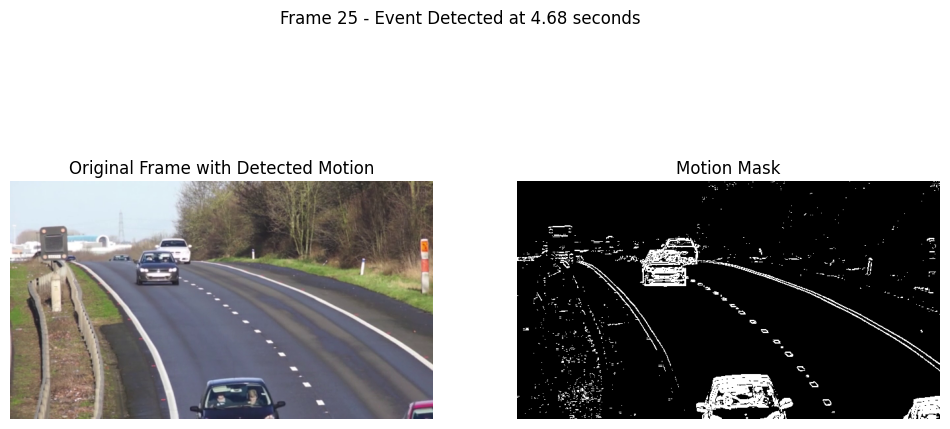

In [8]:
# Display frames with detected motion using matplotlib
for i, (frame, timestamp, motion_mask) in enumerate(motion_detected_frames):
    # Convert frame to RGB for matplotlib
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Create a plot
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    fig.suptitle(f"Frame {i+1} - Event Detected at {timestamp:.2f} seconds")

    # Display the original frame with motion regions highlighted
    ax[0].imshow(frame_rgb)
    ax[0].set_title("Original Frame with Detected Motion")
    ax[0].axis("off")

    # Display the motion mask
    ax[1].imshow(motion_mask, cmap='gray')
    ax[1].set_title("Motion Mask")
    ax[1].axis("off")

    plt.show()

Explanation of Visualization:

**Frame with Motion:** We display the original frame where motion is detected, allowing easy viewing of events.

**Motion Mask:** The second plot shows the binary motion mask for each frame, highlighting the moving regions.

This lab successfully implemented a basic motion estimation and event detection system in Python. Using frame differencing and contour detection, we detected and annotated significant motion events without machine learning. This method can be applied in various scenarios where straightforward motion tracking is required.